## Note: This is a scrap notebook used to experiment with building the model. Please refer to `modeling_process.ipynb` for my final modeling process.

In [63]:
# importing the neceessary packages
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import statsmodels.api as sm
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Step 1: Read in `kc_house_data_train.csv`

In [64]:
housing = pd.read_csv('kc_house_data_train.csv')
housing.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


## Step 2: Data Cleaning

Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [65]:
#housing.info()

In [66]:
housing.shape

(17290, 22)

In [67]:
# removing this column because it's just indexing the houses
# using inplace = True because i want to permanently delete the column
housing.drop('Unnamed: 0', axis=1, inplace=True)

In [68]:
# checking to see if that worked
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [69]:
# deal with the:
# 0 bedrooms & bathrooms - replace with median
# 33 bedrooms - set to 3

## Step 3: Exploratory Data Analysis 
  
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [70]:
# showing stastical information
housing.describe()

# outputs like this shuold not be in the final notebook

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [71]:
# checking to see if
housing.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [72]:
# looking at the distributions
housing.hist

<bound method hist_frame of                id             date      price  bedrooms  bathrooms  \
0      2591820310  20141006T000000   365000.0         4       2.25   
1      7974200820  20140821T000000   865000.0         5       3.00   
2      7701450110  20140815T000000  1038000.0         4       2.50   
3      9522300010  20150331T000000  1490000.0         3       3.50   
4      9510861140  20140714T000000   711000.0         3       2.50   
...           ...              ...        ...       ...        ...   
17285   627300195  20150303T000000   750000.0         5       2.50   
17286  8819900270  20140520T000000   440000.0         2       1.75   
17287  3816300095  20140514T000000   310000.0         3       1.00   
17288   122069107  20141204T000000   427500.0         3       1.50   
17289  6703100135  20150116T000000   348000.0         3       1.50   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             2070      8893     2.0           0     0 

In [73]:
# looking at the correlation matrix of all variables
# instead of loading in a scatterplot matrix
housing.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605
price,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423
bedrooms,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665
bathrooms,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499
sqft_living,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570
sqft_lot,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875
floors,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170
waterfront,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895
view,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185
condition,-0.014272,0.036099,0.025266,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125


In [74]:
# create a few visualizations comparing price and other things
# make these prettier later!

Text(25.125, 0.5, 'Price')

<Figure size 1008x1008 with 0 Axes>

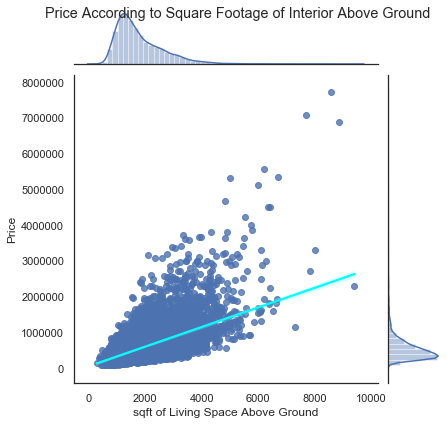

In [75]:
# looking at the relationship between price and square footage of the interior housing space above ground

# plt.style.use('ggplot')
# housing.plot(kind='scatter',x='sqft_above',y='price')

# plt.title('Price according to Square Footage of Interior Above Ground')
# plt.xlabel('sqft of Living Space Above Ground')
# plt.ylabel('Price')

# plt.show()

sns.set(style="white", color_codes=True)
sqft = plt.figure(figsize=(14,14))
sqft = sns.jointplot(data = housing, x='sqft_above', y='price', kind='reg', joint_kws={'line_kws':{'color':'cyan'}})

sqft.fig.suptitle('Price According to Square Footage of Interior Above Ground')
plt.xlabel('sqft of Living Space Above Ground')
plt.ylabel('Price')

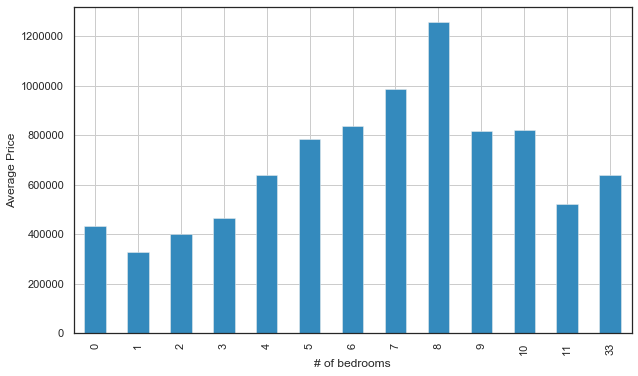

In [76]:
# looking at distribution of # of bedrooms  in relation to price

fig, ax = plt.subplots(figsize=(10,6))

plt.style.use('bmh')
# housing.groupby('bedrooms')['price'].mean().plot(kind='bar')
housing.groupby('bedrooms')['price'].mean().plot(kind='bar')

ax.set_xlabel('# of bedrooms')
ax.set_ylabel('Average Price')

plt.show()

# get rid of 0 bedroom value by replacing it with the median (3.0)

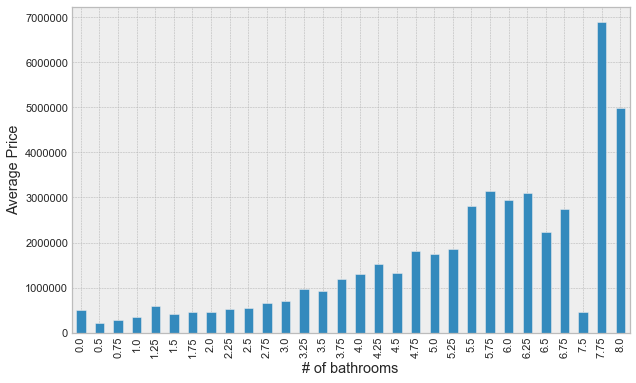

In [77]:
# looking at distribution of # of bathrooms in relation to price

fig, ax = plt.subplots(figsize=(10,6))

plt.style.use('bmh')
housing.groupby('bathrooms')['price'].mean().plot(kind='bar')

ax.set_xlabel('# of bathrooms')
ax.set_ylabel('Average Price')

plt.show()

# get rid of 0 bathroom value by replacing it with the median (2.25)

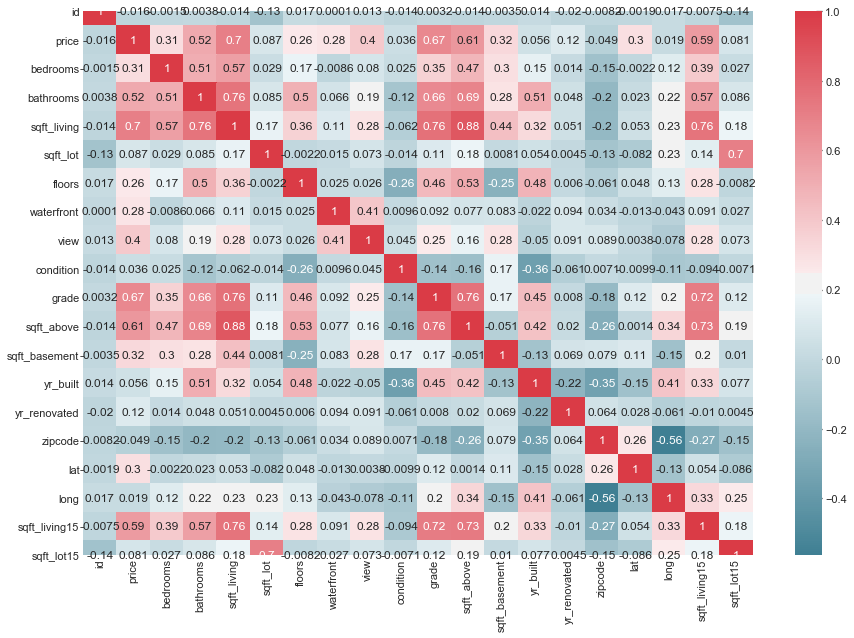

In [99]:
fig, ax = plt.subplots(figsize = (15, 10))
colormap= sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(housing.corr(), annot=True, cmap = colormap)

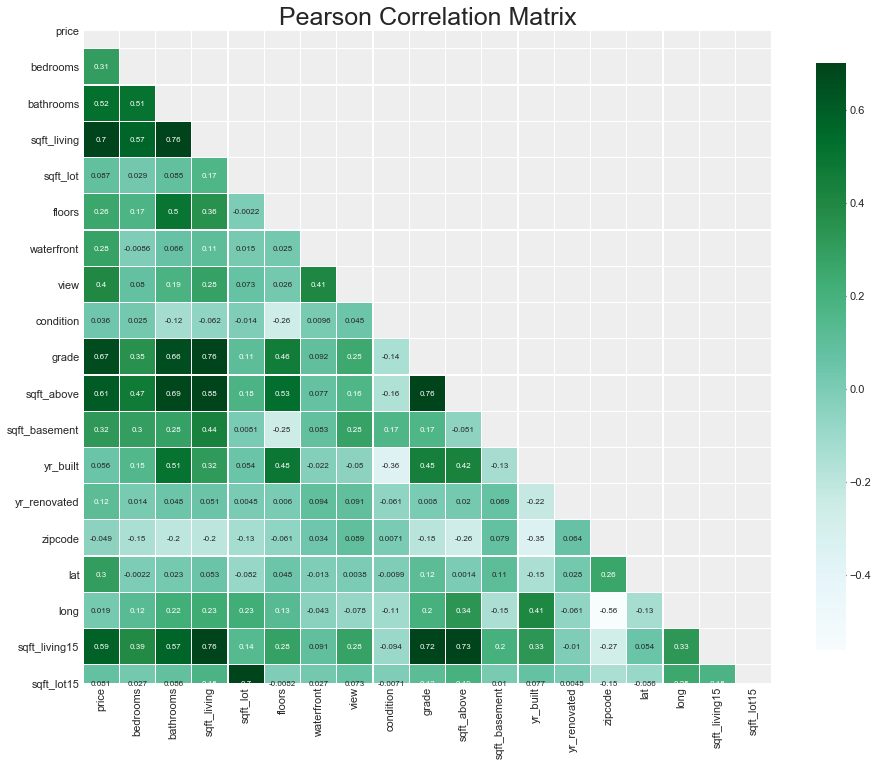

In [102]:
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(housing[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(housing[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

## Step 4: Feature Engineering

Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [80]:
# your code here

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [81]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [82]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [83]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [84]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [85]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [86]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [87]:
#your code here 

### 5.4) Fit the model to the training data.

In [88]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [89]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [90]:
#your code here 

### 5.7) Determine if your model is overfit.

In [91]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [92]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [93]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/